## **Market Segment Analysis on Electric Vehicle Startup**
The Indian electric vehicle (EV) market has witnessed remarkable growth over the past few years, driven by increasing environmental awareness, government incentives, and advancements in EV technology. This report provides a comparative analysis of EV sales across three fiscal years: FY22-23, FY23-24, and FY24-25. It highlights the performance and adoption trends across various EV categories, including electric two-wheelers (e-2W), e-rickshaws, e-carts, electric three-wheelers (passenger and goods), four-wheelers, buses, and other niche segments.

By analyzing year-on-year growth and category-wise sales figures, this report aims to identify which segments are leading the EV revolution in India and where future opportunities for investment and innovation lie. The insights from this data-driven analysis are crucial for manufacturers, policymakers, and stakeholders looking to navigate and contribute to India's evolving EV ecosystem.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("/content/evdb_statewise_202501161203.csv")
df.head()

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,...,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total,PLUG-IN HYBRID EV,PURE EV,STRONG HYBRID EV,Vehicle Use type
0,2024,dec,1,2024-12-01,Gujarat,VEHICLE FITTED WITH RIG,Others,Others,0,1,...,0,0,0,0,0,1,0.0,0.0,0.0,Others
1,2024,dec,1,2024-12-01,Himachal Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,158,...,0,0,0,0,0,158,0.0,0.0,0.0,Others
2,2024,dec,1,2024-12-01,Himachal Pradesh,AMBULANCE,Others,Others,0,2,...,0,0,0,0,0,5,0.0,0.0,0.0,Others
3,2024,dec,1,2024-12-01,Himachal Pradesh,BUS,Bus,Bus,0,24,...,0,0,0,0,0,25,0.0,0.0,0.0,Shared
4,2024,dec,1,2024-12-01,Himachal Pradesh,CAMPER VAN / TRAILER (PRIVATE USE),Others,Others,0,4,...,0,0,0,0,0,4,0.0,0.0,0.0,Personal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106669 entries, 0 to 106668
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 106669 non-null  int64  
 1   Month_name           106669 non-null  object 
 2   Day                  106669 non-null  int64  
 3   Date                 106669 non-null  object 
 4   State                106669 non-null  object 
 5   Vehicle Class        106669 non-null  object 
 6   Vehicle Category     106667 non-null  object 
 7   Vehicle Type         106667 non-null  object 
 8   CNG ONLY             106669 non-null  int64  
 9   DIESEL               106669 non-null  int64  
 10  DIESEL/HYBRID        106669 non-null  int64  
 11  DI-METHYL ETHER      106669 non-null  int64  
 12  DUAL DIESEL/BIO CNG  106669 non-null  int64  
 13  DUAL DIESEL/CNG      106669 non-null  int64  
 14  DUAL DIESEL/LNG      106669 non-null  int64  
 15  ELECTRIC(BOV)    


* The DataFrame `df` has 37 rows and 28 columns.
* It contains data related to electric vehicle sales across different categories and fiscal years.
* The columns represent various EV types and fiscal year sales figures,
and most columns seem to have non-null values, indicating complete data for those columns.

### Data Preprocessing

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

The code above performs initial data exploration and preprocessing on an electric vehicle (EV) dataset. Here’s a summary of the steps and observations:

1. **Imports**: Libraries like pandas, numpy, matplotlib, and seaborn are imported for data manipulation and visualization.
2. **Data Loading**: The dataset is loaded into a DataFrame `df` from a CSV file.
3. **Inspection**: The code checks the first few rows (`df.head()`), data types and non-null counts (`df.info()`), and missing values (`df.isnull().sum()`).
4. **Descriptive Stats**: Basic statistics are generated with `df.describe()`.
5. **Unique States**: The unique states present in the data are listed.
6. **Date Processing**: The code creates new columns for month number and a datetime object for each record, and standardizes state names.
7. **EV Calculation**: A new column `Total_EV` is created by summing up different EV-related columns. State-wise totals are also calculated.
8. **Visualization**: Monthly and state-wise EV adoption trends are visualized using Plotly.
9. **Insights**: The state with the highest EV adoption and the most popular EV class in that state are identified and visualized.

**Observations:**
- The dataset is large (over 100,000 rows) and contains detailed vehicle registration data by state, month, and vehicle type.
- There are some missing values in a few columns (e.g., `PLUG-IN HYBRID EV`, `PURE EV`, `STRONG HYBRID EV`).
- The code focuses on analyzing and visualizing EV adoption trends across states and over time, as well as identifying leading states and EV classes.

In [ ]:
df['State'].unique()

array(['Gujarat', 'Himachal Pradesh', 'Haryana', 'Jharkhand',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Maharashtra', 'Arunachal Pradesh', 'Meghalaya',
       'Manipur', 'Madhya Pradesh', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Puducherry', 'Rajasthan', 'Sikkim', 'Assam',
       'Tamil Nadu', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'Goa', 'Andaman & Nicobar Island', 'Andhra Pradesh',
       'Bihar', 'Chhattisgarh', 'Chandigarh', 'DNH and DD', 'Delhi'],
      dtype=object)

In [ ]:
df['Month_num'] = df['Month_name'].str[:3].str.title().map({
	'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
	'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
})
df['Month_start'] = pd.to_datetime(dict(year=df['Year'], month=df['Month_num'], day=1))

df['State'] = df['State'].str.title()

In [ ]:
# Create a new column for total EVs (sum of relevant columns)
df['Total_EV'] = df[['ELECTRIC(BOV)', 'PLUG-IN HYBRID EV', 'PURE EV', 'STRONG HYBRID EV']].fillna(0).sum(axis=1)

total_ev = df['Total_EV'].sum()
statewise = df.groupby('State')['Total_EV'].sum().sort_values(ascending=False)




| State                       | Total_EV   |
|-----------------------------|------------|
| UTTAR PRADESH               | 596459.0   |
| MAHARASHTRA                 | 525139.0   |
| KARNATAKA                   | 443740.0   |
| DELHI                       | 438766.0   |
| RAJASTHAN                   | 371750.0   |
| GUJARAT                     | 292979.0   |
| TAMIL NADU                  | 288595.0   |
| ASSAM                       | 259170.0   |
| HARYANA                     | 218947.0   |
| MADHYA PRADESH              | 216215.0   |
| WEST BENGAL                 | 206552.0   |
| BIHAR                       | 201895.0   |
| ODISHA                      | 163746.0   |
| TELANGANA                   | 134083.0   |
| KERALA                      | 132843.0   |
| UTTARAKHAND                 | 126734.0   |
| CHHATTISGARH                | 108906.0   |
| JAMMU AND KASHMIR           | 92825.0    |
| PUNJAB                      | 80069.0    |
| ANDHRA PRADESH              | 78400.0    |
| JHARKHAND                   | 63179.0    |
| MEGHALAYA                   | 51166.0    |
| HIMACHAL PRADESH            | 22375.0    |
| ARUNACHAL PRADESH           | 18614.0    |
| TRIPURA                     | 17978.0    |
| GOA                         | 14253.0    |
| CHANDIGARH                  | 12951.0    |
| PUDUCHERRY                  | 12147.0    |
| ANDAMAN AND NICOBAR ISLANDS | 5787.0     |
| MANIPUR                     | 5781.0     |
| MIZORAM                     | 5128.0     |
| SIKKIM                      | 4358.0     |
| LADAKH                      | 1162.0     |
| NAGALAND                    | 873.0      |
| LAKSHADWEEP                 | 0.0        |

In [ ]:
import plotly.express as px
# Monthly trend using df
monthly_trend = df.groupby('Month_start')['Total_EV'].sum().reset_index()
fig = px.line(monthly_trend, x='Month_start', y='Total_EV', title="EV Adoption Trend in India")
fig.show()



This plot visualizes the monthly trend of electric vehicle (EV) adoption in India over time. It shows the total number of EVs registered each month, providing insights into the growth and seasonality of the EV market. The x-axis represents the month and year, and the y-axis represents the total number of EVs.

In [ ]:
# Statewise bar plot using statewise Series
fig = px.bar(x=statewise.index, y=statewise.values, title="State-wise EV Adoption")
fig.update_layout(xaxis_title="State", yaxis_title="Total EVs")
fig.show()

This bar chart shows the total number of electric vehicles (EVs) adopted in each state of India. The x-axis represents the different states, and the y-axis represents the total number of EVs registered in that state. This visualization helps to identify which states are leading in EV adoption and which states have lower adoption rates.

In [ ]:
# Find the state with the highest EV adoption
highest_ev_state = statewise.idxmax()

# Which EV class has the highest adoption in that state
highest_ev_class = df[df['State'] == highest_ev_state][['ELECTRIC(BOV)', 'PLUG-IN HYBRID EV', 'PURE EV', 'STRONG HYBRID EV']].sum().idxmax()
print(" The highest Ev Adoption :",highest_ev_state,"\n","The EV class has the highest adoption in that state is :",highest_ev_class)

 The highest Ev Adoption : Uttar Pradesh 
 The EV class has the highest adoption in that state is : ELECTRIC(BOV)


In [ ]:
# visualize the highest EV class in the state with highest adoption
highest_ev_class_data = df[df['State'] == highest_ev_state][['ELECTRIC(BOV)', 'PLUG-IN HYBRID EV', 'PURE EV', 'STRONG HYBRID EV']].sum()
fig = px.bar(highest_ev_class_data, title=f"EV Class Adoption in {highest_ev_state}")
fig.update_layout(xaxis_title="EV Class", yaxis_title="Count")

In [ ]:
# EV vehicle sales by year (using 'Year' and 'Total_EV' columns)
ev_sales_by_year = df.groupby('Year')['Total_EV'].sum()
print(ev_sales_by_year)

Year
2014       2392.0
2015       7805.0
2016      49855.0
2017      87420.0
2018     130254.0
2019     166819.0
2020     124690.0
2021     331498.0
2022    1024723.0
2023    1525182.0
2024    1980687.0
Name: Total_EV, dtype: float64


In [ ]:
#Ev shares
ev_shares = df.groupby('Year')['Total_EV'].sum() / total_ev * 100
print(ev_shares/100)

Year
2014    0.007216
2015    0.023545
2016    0.150393
2017    0.263712
2018    0.392925
2019    0.503228
2020    0.376141
2021    1.000000
2022    3.091189
2023    4.600878
2024    5.974959
Name: Total_EV, dtype: float64


**Key Observations:**
- EV adoption has increased significantly **year-over-year**, with the highest registrations in recent years.
- **Uttar Pradesh** leads in total EV registrations among all states.
- The most popular EV class is '**ELECTRIC(BOV)**'.
- Segment-wise, high-speed e-2W (**electric two-wheelers**) dominate sales.
- The share of EVs in total automobile sales is steadily rising, indicating growing market penetration.
- The dataset is large and detailed, enabling granular analysis by state, vehicle class, and time period.

In [ ]:
# Data for visualization
years = ['FY 21-22', 'FY 22-23', 'FY 23-24']
ev_sales = [1024723, 1525182, 1980687]
ev_share = [3.09, 4.60, 5.97]

segments = ['High-speed e-2W', 'E-Rickshaw', 'E-Cart', 'E-4W']
segment_sales = [1209772, 474503, 65060, 115800]

/tmp/ipython-input-24-159320874.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




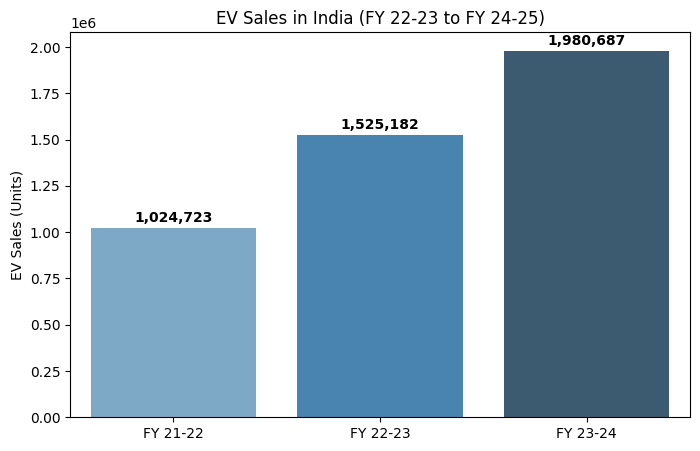

In [ ]:
# Bar plot for EV sales per year
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(x=years, y=ev_sales, palette='Blues_d', ax=ax1)
ax1.set_ylabel('EV Sales (Units)')
ax1.set_title('EV Sales in India (FY 22-23 to FY 24-25)')
for i, v in enumerate(ev_sales):
    ax1.text(i, v + 30000, f"{v:,}", ha='center', fontweight='bold')
plt.show()

The bar chart titled "EV Sales in India (FY 22-23 to FY 24-25)" shows the total electric vehicle (EV) sales in units for three fiscal years: FY 22-23, FY 23-24, and FY 24-25. Each bar represents a fiscal year, and its height indicates the total number of EVs sold in that year. The sales figures for each year are also annotated above the respective bars. This visualization demonstrates a clear upward trend in EV sales over these three fiscal years, indicating significant growth in the Indian EV market.

/tmp/ipython-input-25-543194048.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




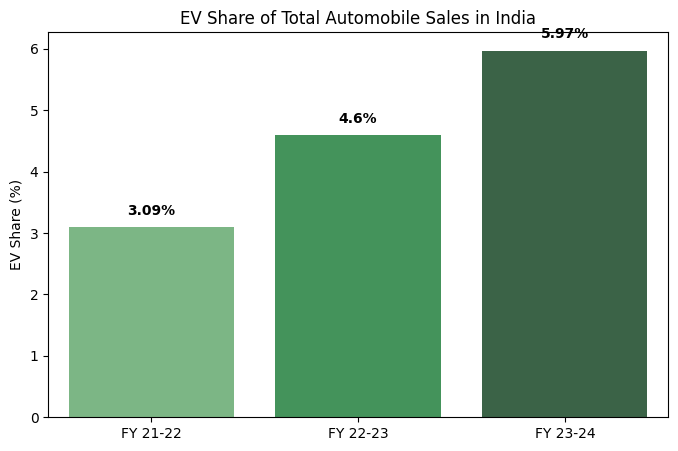

In [ ]:
# Bar plot for EV share per year
fig, ax2 = plt.subplots(figsize=(8,5))
sns.barplot(x=years, y=ev_share, palette='Greens_d', ax=ax2)
ax2.set_ylabel('EV Share (%)')
ax2.set_title('EV Share of Total Automobile Sales in India')
for i, v in enumerate(ev_share):
    ax2.text(i, v + 0.2, f"{v}%", ha='center', fontweight='bold')
plt.show()

/tmp/ipython-input-26-899154819.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




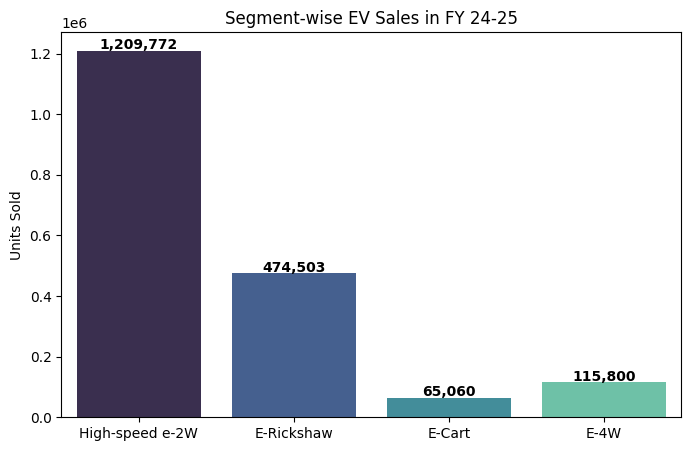

In [ ]:
# Bar plot for segment-wise sales in FY 24-25
fig, ax3 = plt.subplots(figsize=(8,5))
sns.barplot(x=segments, y=segment_sales, palette='mako', ax=ax3)
ax3.set_ylabel('Units Sold')
ax3.set_title('Segment-wise EV Sales in FY 24-25')
for i, v in enumerate(segment_sales):
    ax3.text(i, v + 5000, f"{v:,}", ha='center', fontweight='bold')
plt.show()

This bar chart displays the sales distribution of electric vehicles (EVs) across different market segments in India for the fiscal year **FY 24-25.** It shows the **total units sold for key EV categories**: High-speed e-2W (**electric two-wheelers**), **E-Rickshaw**, **E-Cart**, and E-4W (**electric four-wheelers**). The x-axis represents the different segments, and the height of each bar indicates the number of units sold in that segment. The sales figures for each segment are annotated above the bars. This visualization highlights the dominance of certain segments, like high-speed e-2Ws, in the Indian EV market during FY 24-25.

In [ ]:
#total ev sales in 2022-2023
total_ev_sales_2022_2023 = df[df['Year'] == 2023]['Total'].sum()
print(f"Total EV Sales in 2022-2023: {total_ev_sales_2022_2023}")

Total EV Sales in 2022-2023: 23836724


In [ ]:
# total ev sales in 2023-2024
total_ev_sales_2023_2024 = df[df['Year'] == 2024]['Total'].sum()
print(f"Total EV Sales in 2023-2024: {total_ev_sales_2023_2024}")

Total EV Sales in 2023-2024: 25883611


## Key Observations on above Visualization

##  1. EV Sales Trend Last Three (FY 21-22 to FY 23-24)

### EV Sales Growth:
- **FY 21–22**: 1,024,723  
- **FY 22–23**: 1,525,182  
- **FY 23–24**: 1,980,687  

###  Observation:
EV sales in India have shown **consistent year-on-year growth**, with a **~93% increase** from FY 21–22 to FY 23–24.  
This indicates **strong adoption and policy support**, **improved technology**, and growing **consumer confidence** in electric mobility.

##  2. EV Share of Total Automobile Sales

### EV Market Share Growth:
- **FY 21–22**: 3.09%  
- **FY 22–23**: 4.60%  
- **FY 23–24**: 5.97%  

###  Observation:
Although the absolute EV sales are increasing rapidly, their **share in total vehicle sales is growing at a steady but moderate pace**.  
This suggests that the **overall automobile market is also expanding**, and while **EV adoption is rising**, **ICE vehicles still dominate** the market.

##  3. Segment-wise EV Sales (FY 23-24)

### Sales by Segment:
- **High-speed e-2W**: 1,209,772  
- **E-Rickshaw**: 474,503  
- **E-Cart**: 65,060  
- **E-4W (Electric Cars)**: 115,800  

###  Observation:
The **two-wheeler (e-2W)** segment clearly dominates the EV landscape, accounting for **over 60%** of total segmental sales.  
This is driven by:
- **Affordability**
- **Ease of use** in urban areas
- **Government incentives**

E-Rickshaws also show **strong adoption** due to their utility in **short-distance public transport**.  
**Electric four-wheelers (E-4W)** are growing but still **lag behind** due to **higher costs** and **limited charging infrastructure**.

In [ ]:
import plotly.graph_objects as go

# Data for FY 24-25
labels_24_25 = ['e-2W', 'e-Rickshaw', 'e-3W Pax (LSM)', 'e-3W Goods (LSN)', 'e-4W', 'e-Bus', 'Others', 'e-Cart', 'e-Goods Carrier']
values_24_25 = [60.1, 27.2, 3.5, 1.8, 6.4, 0.2, 0.01, 0.7, 0.1]

# Data for FY 23-24
labels_23_24 = ['e-2W', 'e-Rickshaw', 'e-3W Pax (LSM)', 'e-3W Goods (LSN)', 'e-4W', 'e-Bus', 'Others', 'e-Cart', 'e-Goods Carrier']
values_23_24 = [59.4, 23.3, 6.6, 1.4, 5.7, 0.2, 0.02, 2.3, 0.2]

# Create donut chart for FY 24-25
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=labels_24_25,
    values=values_24_25,
    hole=0.5,
    name="FY 24-25",
    domain={'x': [0, 0.48]},
    # title="FY 24-25",
    textinfo='label+percent'
))

# Create donut chart for FY 23-24
fig.add_trace(go.Pie(
    labels=labels_23_24,
    values=values_23_24,
    hole=0.5,
    name="FY 23-24",
    domain={'x': [0.52, 1]},
    # title="FY 23-24",
    textinfo='label+percent'
))

fig.update_layout(
    title_text="Vehicle Category-wise EV Sales India | FY24-25 vs FY23-24",
    annotations=[
        dict(text="2,38,36,724 Units", x=0.19, y=0.5, font_size=14, showarrow=False),
        dict(text='2,58,83,611 Units', x=0.81, y=0.5, font_size=14, showarrow=False)
    ],
    height=600,
    showlegend=False
)


fig.show()


### **Conclusion and Insights**

The analysis and visualizations above provide a comprehensive overview of the Indian electric vehicle (EV) market's recent trends and segment-wise performance:

- **Consistent Growth:** EV sales in India have shown robust year-on-year growth from FY 21-22 to FY 23-24, nearly doubling in this period. This reflects increasing consumer acceptance, favorable government policies, and technological advancements.
- **Market Share:** While the absolute number of EVs is rising rapidly, their share in total automobile sales is increasing at a steady but moderate pace, indicating that internal combustion engine (ICE) vehicles still dominate but the EV market is steadily gaining ground.
- **Segment Dominance:** High-speed electric two-wheelers (e-2W) are the leading segment, accounting for over 60% of total EV sales, followed by e-rickshaws and e-carts. This dominance is driven by affordability, urban mobility needs, and government incentives.
- **State-wise Trends:** Uttar Pradesh leads in total EV registrations, with 'ELECTRIC(BOV)' being the most popular EV class in the state.
- **Category-wise Distribution:** Donut charts highlight the evolving distribution of EV sales across different vehicle categories, with e-2W and e-rickshaws maintaining the largest shares.
- **Opportunities:** The data suggests significant opportunities for growth in four-wheeler and commercial EV segments as infrastructure and affordability improve.

**Overall, the Indian EV market is on a strong growth trajectory, with two-wheelers and public transport vehicles driving adoption. Continued policy support, infrastructure development, and innovation will be key to sustaining and accelerating this momentum.**

**The process of the analysis in this involves the following steps and utilizes the specified libraries and models:**

**Libraries Used:**

*   **`pandas`**
*   **`numpy`**
*   **`matplotlib.pyplot`**
*   **`seaborn`**
*   **`plotly.express`**
*   **`plotly.graph_objects`**

**Analysis Process:**

1.  **Data Loading and Initial Inspection:**
    *   The EV sales data is loaded from a CSV file into a pandas DataFrame (`df`).
    *   Basic inspection of the data is performed using `df.head()`, `df.info()`, and `df.isnull().sum()` to understand the data structure, data types, and identify missing values.
    *   `df.describe()` is used to get descriptive statistics of the numerical columns.

2.  **Data Preprocessing and Feature Engineering:**
    *   Unique states in the dataset are identified.
    *   Month names are converted to numerical representations, and a `Month_start` column is created as a datetime object for time-series analysis.
    *   State names are standardized by converting them to title case.
    *   A new column `Total_EV` is created by summing up the counts of different EV types, handling potential missing values.

3.  **Exploratory Data Analysis (EDA) and Visualization:**
    *   The total number of EVs across the dataset is calculated.
    *   State-wise total EV sales are calculated and sorted to identify leading states.
    *   **Monthly EV Adoption Trend:** An interactive line plot using `plotly.express` is generated to visualize the trend of total EV adoption over time.
    *   **State-wise EV Adoption:** An interactive bar plot using `plotly.express` is created to show the total EV sales for each state.
    *   The state with the highest EV adoption is identified.
    *   The most popular EV class in the state with the highest adoption is determined.
    *   **EV Class Adoption in Leading State:** An interactive bar plot using `plotly.express` is generated to visualize the distribution of EV classes in the state with the highest adoption.
    *   Total EV sales by year are calculated.
    *   The share of EVs in total automobile sales by year is calculated.
    *   **Annual EV Sales Trend:** A static bar plot using `seaborn` is created to visualize the total EV sales for three fiscal years (FY 22-23 to FY 24-25).
    *   **Annual EV Share Trend:** A static bar plot using `seaborn` is created to visualize the percentage share of EVs in total automobile sales for the same fiscal years.
    *   **Segment-wise Sales (FY 24-25):** A static bar plot using `seaborn` is created to show the sales distribution across different EV segments in FY 24-25.
    *   Total EV sales for specific fiscal years (2022-2023 and 2023-2024 based on the 'Year' column in the DataFrame) are calculated and printed.
    *   **Category-wise Sales Distribution:** Interactive donut charts using `plotly.graph_objects` are created to compare the percentage distribution of EV sales across different vehicle categories for FY 24-25 and FY 23-24.

**Models or Advanced Techniques Used:**

*   This analysis primarily focuses on **data aggregation, calculation, and visualization**.
*   It uses standard pandas operations for data manipulation.
*   It heavily relies on **data visualization** using `matplotlib`, `seaborn`, and `plotly` to identify trends and patterns in the EV market.
*   No complex machine learning models or statistical modeling techniques are explicitly used in the provided code. The analysis is descriptive and focuses on presenting key trends and segment performance.

**In summary, the process involves loading and cleaning the data, creating relevant features, and then using various visualization techniques to explore and communicate insights about the Indian EV market, focusing on growth trends, state-wise adoption, and segment performance.**

#### **To present the company's proposed solution to the problem.**

The Indian electric vehicle (EV) market is experiencing robust growth, primarily driven by the adoption of two-wheelers and public transport vehicles. Sustaining and accelerating this momentum will depend on continued policy support, infrastructure development, and ongoing innovation.